In [625]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [626]:
df = pd.read_excel(r"LT Meter Data.xlsx")

In [627]:
data = df.sort_values(by = 'DATE', ignore_index=True)

In [628]:
fd = data
data=fd[['DATE', 'voltage_status']]

In [629]:
fd['date']=pd.to_datetime(fd['DATE'])


In [630]:
data=data.set_index(fd.date)
data=data.drop(['DATE'],axis=1)

In [631]:
data = data[data['voltage_status']!=0]

In [632]:
min=data.resample('T').last().ffill()
df=min
df.reset_index(inplace=True)

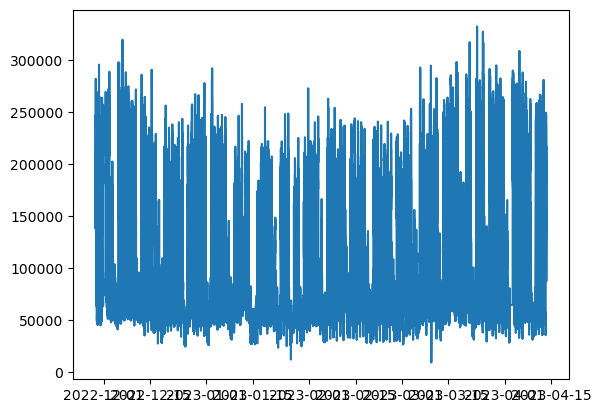

<Figure size 1200x1200 with 0 Axes>

In [633]:
plt.plot(df['date'],df['voltage_status'])
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.show()

In [634]:
# for period calculation 
mean = df['date'].mean()
std = str(df['date'].std())
print(std)
num = std.split(' ')
period = int(num[0])
#print(mean)

39 days 06:28:25.666681583


In [635]:
print(num)
print(type(period))

['39', 'days', '06:28:25.666681583']
<class 'int'>


In [636]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose

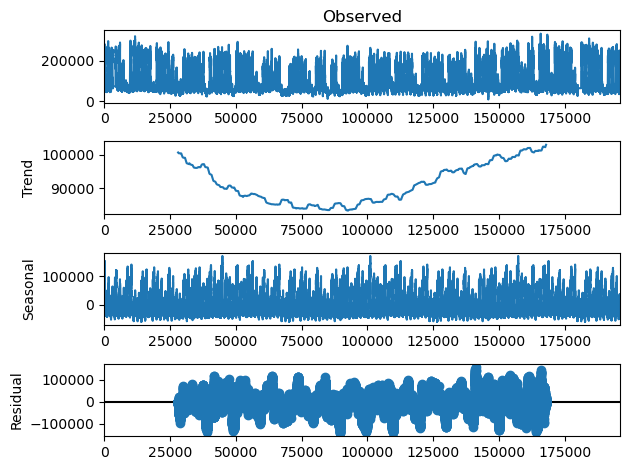

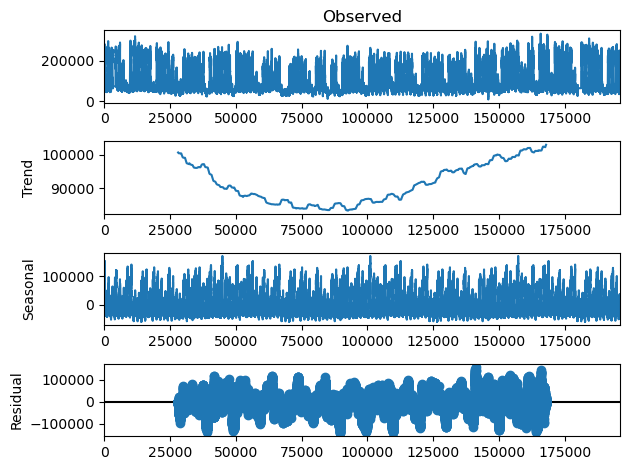

In [637]:

results = seasonal_decompose(df['voltage_status'].values,period=period*60*24)
results.plot()

In [638]:
df['trend'] = results.trend
df['seasonal'] = results.seasonal

In [639]:
df['trend'] = df['trend'].fillna(df['trend'].mean())

In [640]:
df['trend'].isna().sum()

0

In [641]:
# sampling the time periods through dates 

df['dates_n'] = pd.to_datetime(df['date']).dt.date
print(df['dates_n'])
unique_d = df['dates_n']
print(len(df['dates_n'].unique()))

0         2022-11-28
1         2022-11-28
2         2022-11-28
3         2022-11-28
4         2022-11-28
             ...    
195884    2023-04-13
195885    2023-04-13
195886    2023-04-13
195887    2023-04-13
195888    2023-04-13
Name: dates_n, Length: 195889, dtype: object
137


In [642]:
df['times'] = pd.to_datetime(df['date']).dt.time

print(len(df['times'].unique()))

1440


In [643]:
daY_1 = df[df['dates_n'] == unique_d[2116]]

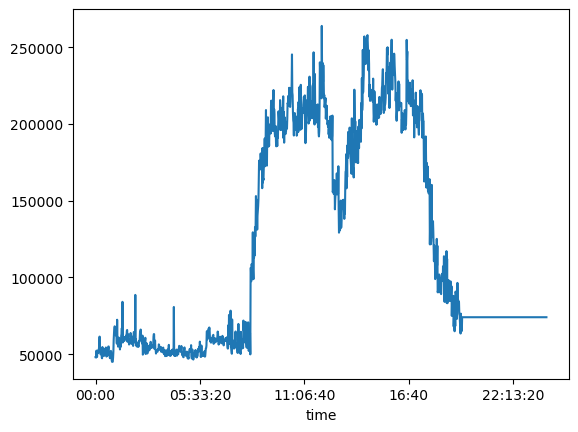

In [644]:
plt.plot(daY_1['times'],daY_1['voltage_status'])

In [645]:
unique_dates = df['dates_n'].unique()
print(unique_dates)

[datetime.date(2022, 11, 28) datetime.date(2022, 11, 29)
 datetime.date(2022, 11, 30) datetime.date(2022, 12, 1)
 datetime.date(2022, 12, 2) datetime.date(2022, 12, 3)
 datetime.date(2022, 12, 4) datetime.date(2022, 12, 5)
 datetime.date(2022, 12, 6) datetime.date(2022, 12, 7)
 datetime.date(2022, 12, 8) datetime.date(2022, 12, 9)
 datetime.date(2022, 12, 10) datetime.date(2022, 12, 11)
 datetime.date(2022, 12, 12) datetime.date(2022, 12, 13)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 15)
 datetime.date(2022, 12, 16) datetime.date(2022, 12, 17)
 datetime.date(2022, 12, 18) datetime.date(2022, 12, 19)
 datetime.date(2022, 12, 20) datetime.date(2022, 12, 21)
 datetime.date(2022, 12, 22) datetime.date(2022, 12, 23)
 datetime.date(2022, 12, 24) datetime.date(2022, 12, 25)
 datetime.date(2022, 12, 26) datetime.date(2022, 12, 27)
 datetime.date(2022, 12, 28) datetime.date(2022, 12, 29)
 datetime.date(2022, 12, 30) datetime.date(2022, 12, 31)
 datetime.date(2023, 1, 1) datetime.date

In [646]:
# splitting parameter for the data 
div = int(len(unique_dates)*0.2)
print(div)

27


In [647]:
u_d = unique_dates[:-div]

In [648]:
print(u_d)

[datetime.date(2022, 11, 28) datetime.date(2022, 11, 29)
 datetime.date(2022, 11, 30) datetime.date(2022, 12, 1)
 datetime.date(2022, 12, 2) datetime.date(2022, 12, 3)
 datetime.date(2022, 12, 4) datetime.date(2022, 12, 5)
 datetime.date(2022, 12, 6) datetime.date(2022, 12, 7)
 datetime.date(2022, 12, 8) datetime.date(2022, 12, 9)
 datetime.date(2022, 12, 10) datetime.date(2022, 12, 11)
 datetime.date(2022, 12, 12) datetime.date(2022, 12, 13)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 15)
 datetime.date(2022, 12, 16) datetime.date(2022, 12, 17)
 datetime.date(2022, 12, 18) datetime.date(2022, 12, 19)
 datetime.date(2022, 12, 20) datetime.date(2022, 12, 21)
 datetime.date(2022, 12, 22) datetime.date(2022, 12, 23)
 datetime.date(2022, 12, 24) datetime.date(2022, 12, 25)
 datetime.date(2022, 12, 26) datetime.date(2022, 12, 27)
 datetime.date(2022, 12, 28) datetime.date(2022, 12, 29)
 datetime.date(2022, 12, 30) datetime.date(2022, 12, 31)
 datetime.date(2023, 1, 1) datetime.date

In [649]:

df['train'] = df['dates_n'].apply(lambda x: 1 if x in u_d else 0)

In [650]:
# creating new dataframe for manipulating the data for train-test split 
dfx = df.drop(['dates_n','times'],axis = 1)


In [651]:
df['trend'].isna().sum()

0

In [652]:
df

,date,voltage_status,trend,seasonal,dates_n,times,train
0,2022-11-28 12:45:00,166630.0,91225.88238,21910.636769,2022-11-28,12:45:00,1
1,2022-11-28 12:46:00,167020.0,91225.88238,7305.660852,2022-11-28,12:46:00,1
2,2022-11-28 12:47:00,183090.0,91225.88238,8260.667306,2022-11-28,12:47:00,1
3,2022-11-28 12:48:00,181220.0,91225.88238,8040.656934,2022-11-28,12:48:00,1
4,2022-11-28 12:49:00,176710.0,91225.88238,3385.694951,2022-11-28,12:49:00,1
...,...,...,...,...,...,...,...
195884,2023-04-13 13:29:00,121820.0,91225.88238,-21387.441267,2023-04-13,13:29:00,0
195885,2023-04-13 13:30:00,131650.0,91225.88238,-19477.534082,2023-04-13,13:30:00,0
195886,2023-04-13 13:31:00,137720.0,91225.88238,-22877.565956,2023-04-13,13:31:00,0
195887,2023-04-13 13:32:00,135860.0,91225.88238,-20697.580423,2023-04-13,13:32:00,0


In [653]:
train = df[df['train']==1]

In [654]:
test = df[df['train']==0]

In [655]:
test.isna().sum()

date              0
voltage_status    0
trend             0
seasonal          0
dates_n           0
times             0
train             0
dtype: int64

In [656]:
train.isna().sum()

date              0
voltage_status    0
trend             0
seasonal          0
dates_n           0
times             0
train             0
dtype: int64

In [657]:
train = train.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [658]:
test=test.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [659]:
# #
# def up(sample,n,results):
#     sequence_length = 1440
#     new_x = []
#     new_y = []
#     for i in range(n-sequence_length):
#         new_x.append(np.concatenate([sample[i:i+sequence_length],results[i:i+sequence_length]]))
#         new_y.append(sample[i+sequene_length])
        
# train_x,train_y = up(train,len(train),results)
# test_x,test_y = up(test,len(test),results)
        

In [660]:
print(train,test)

                     voltage_status          trend      seasonal
date                                                            
2022-11-28 12:45:00        166630.0   91225.882380  21910.636769
2022-11-28 12:46:00        167020.0   91225.882380   7305.660852
2022-11-28 12:47:00        183090.0   91225.882380   8260.667306
2022-11-28 12:48:00        181220.0   91225.882380   8040.656934
2022-11-28 12:49:00        176710.0   91225.882380   3385.694951
...                             ...            ...           ...
2023-03-17 23:55:00         77730.0  100300.567575 -30181.693567
2023-03-17 23:56:00         67030.0  100303.541489 -31715.162940
2023-03-17 23:57:00         78060.0  100305.662037 -28401.673951
2023-03-17 23:58:00         76470.0  100307.997863 -29948.272449
2023-03-17 23:59:00         64150.0  100310.862358 -33968.354684

[157635 rows x 3 columns]                      voltage_status          trend      seasonal
date                                                           

In [661]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [662]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
     

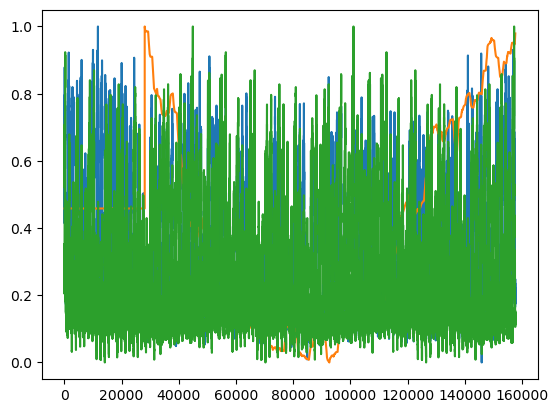

In [663]:
# plt.plot(train)
plt.plot(scaled_train[0] )

In [664]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [665]:
train

,voltage_status,trend,seasonal
date,,,
2022-11-28 12:45:00,166630.0,91225.882380,21910.636769
2022-11-28 12:46:00,167020.0,91225.882380,7305.660852
2022-11-28 12:47:00,183090.0,91225.882380,8260.667306
2022-11-28 12:48:00,181220.0,91225.882380,8040.656934
2022-11-28 12:49:00,176710.0,91225.882380,3385.694951
...,...,...,...
2023-03-17 23:55:00,77730.0,100300.567575,-30181.693567
2023-03-17 23:56:00,67030.0,100303.541489,-31715.162940
2023-03-17 23:57:00,78060.0,100305.662037,-28401.673951


In [666]:
# define generator
n_input = 2
n_features = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)

In [667]:

from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf


In [668]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
# model.add(LSTM(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse',metrics = ['accuracy'])

In [669]:
from timeit import default_timer as timer
start = timer()
# fit model

history = model.fit(generator,epochs=12)
end = timer()
print('time taken for training '+str(end-start))

Epoch 1/12
7882/7882 [==============================] - 16s 2ms/step - loss: 0.0317 - accuracy: 1.9032e-05
Epoch 2/12
7882/7882 [==============================] - 14s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 3/12
7882/7882 [==============================] - 16s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 4/12
7882/7882 [==============================] - 16s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 5/12
7882/7882 [==============================] - 16s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 6/12
7882/7882 [==============================] - 15s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 7/12
7882/7882 [==============================] - 15s 2ms/step - loss: 0.0310 - accuracy: 1.6917e-05
Epoch 8/12
7882/7882 [==============================] - 16s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 9/12
7882/7882 [==============================] - 15s 2ms/step - loss: 0.0310 - accuracy: 1.9032e-05
Epoch 10/12
7882/7882 [==============

In [670]:
# import matplotlib.pyplot as plt        
# from matplotlib.pyplot import figure
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')
# fig = figure(figsize=(25, 5), dpi=80)
# fig.patch.set_facecolor((1.0, 1.0, 1.0))
# pd.DataFrame(history.history).plot(figsize = (8,5))
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.grid(True)
# plt.gca().set_ylim(0,1)
# plt.show()

In [671]:
generator = TimeseriesGenerator(scaled_test,scaled_test,length = n_input,batch_size = 2)
pred = model.predict(generator)

19126/19126 [==============================] - 15s 759us/step


In [672]:
print(np.shape(scaled_test))

(38254, 3)


In [673]:
test

,voltage_status,trend,seasonal
date,,,
2023-03-18 00:00:00,65750.0,100313.747062,-33931.781590
2023-03-18 00:01:00,58780.0,100316.090367,-37441.731079
2023-03-18 00:02:00,58410.0,100318.002493,-37924.917333
2023-03-18 00:03:00,61310.0,100320.224448,-34408.227548
2023-03-18 00:04:00,60200.0,100323.034455,-33895.001111
...,...,...,...
2023-04-13 13:29:00,121820.0,91225.882380,-21387.441267
2023-04-13 13:30:00,131650.0,91225.882380,-19477.534082
2023-04-13 13:31:00,137720.0,91225.882380,-22877.565956


In [674]:
print(np.shape(pred))
print(pred)

(38252, 1)
[[0.4121396 ]
 [0.40740466]
 [0.4122225 ]
 ...
 [0.3334037 ]
 [0.33933064]
 [0.34072673]]


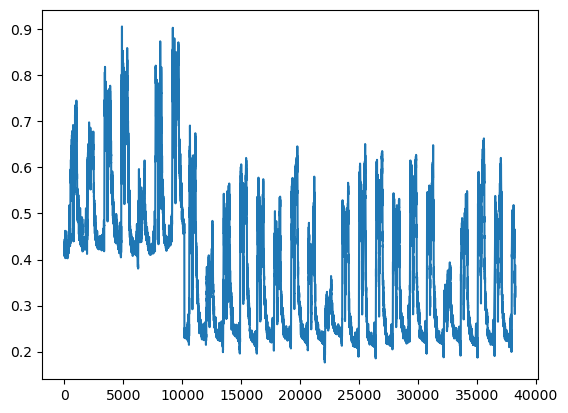

In [675]:
# pred = scaler.inverse_transform(pred)

# plt.plot(test)
# plt.plot(train)
# #plt.plot(pred)
# plt.plot(test)
# plt.plot(train)
plt.plot(pred)

In [676]:
print(type(pred))
pred = pred.reshape(-1,1)

<class 'numpy.ndarray'>


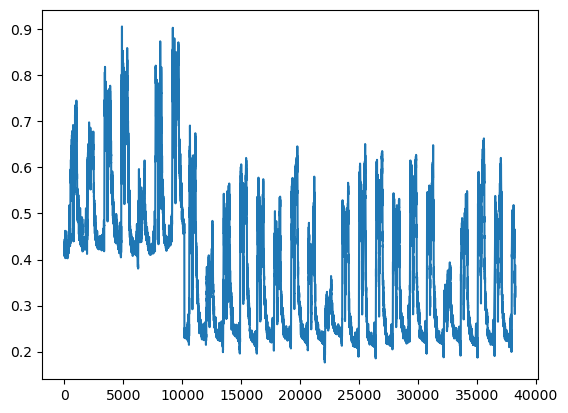

In [677]:
plt.plot(pred)
re = seasonal_decompose(pred,period=1440)

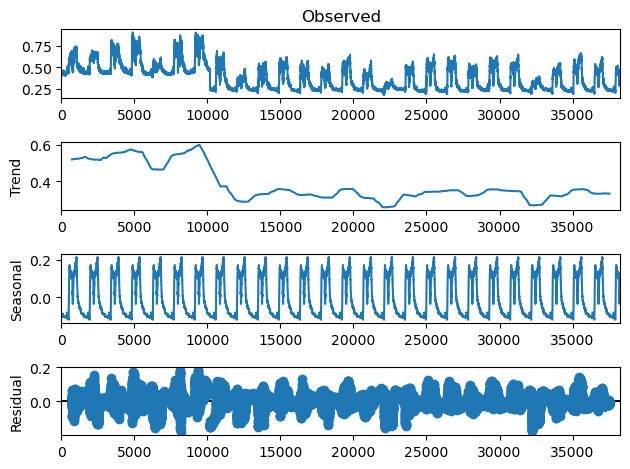

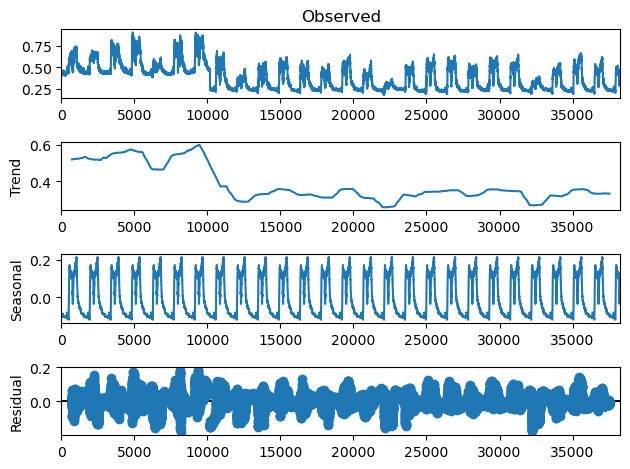

In [678]:
re.plot()

In [679]:
print(pred.reshape(1,-1))

[[0.4121396  0.40740466 0.4122225  ... 0.3334037  0.33933064 0.34072673]]


In [680]:
print(np.shape(pred))

(38252, 1)


In [681]:
pred = pred.flatten()

In [682]:
df_pred = pd.DataFrame({'pred':pred,'trend':re.trend,'seasonal':re.seasonal})

In [683]:
df_pred['trend'] = df_pred['trend'].fillna(df_pred['trend'].mean())


In [684]:
df_pred['trend'].isna().sum()

0

<Axes: >

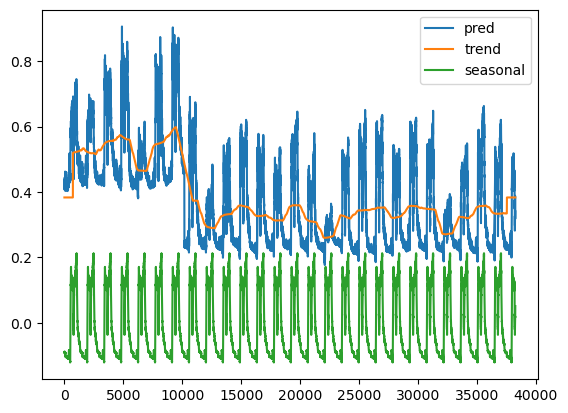

In [685]:

df_pred.plot()
# plt.plot(test)
# plt.plot(pred)


In [686]:
df_pred

,pred,trend,seasonal
0,0.412140,0.383157,-0.089613
1,0.407405,0.383157,-0.089688
2,0.412223,0.383157,-0.091621
3,0.415050,0.383157,-0.089555
4,0.416067,0.383157,-0.089832
...,...,...,...
38247,0.325081,0.383157,0.037752
38248,0.326348,0.383157,0.043686
38249,0.333404,0.383157,0.043873
38250,0.339331,0.383157,0.046023


In [687]:
df_pred.columns = ['voltage_status','trend','seasonal']

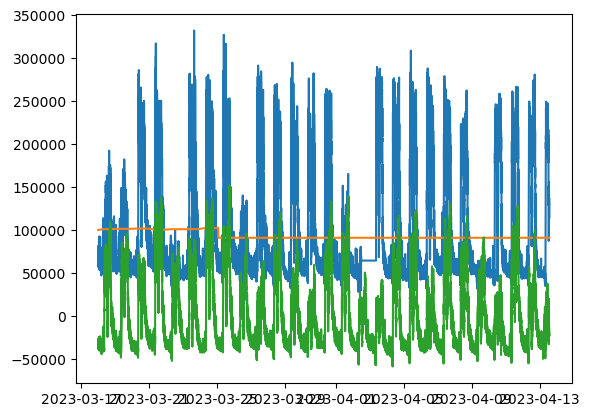

In [688]:
plt.plot(test)

In [689]:
from datetime import date
# def scaler(num):
#     num = MinMaxScaler().fit_transform(num)
#     return num 

def forecast(num_prediction,model):
    #
    
    forecast_list = df_pred[-1440:]
    # print(forecast_list)
    # print(len(forecast_list))
    x = forecast_list[-1440:]
    x = scaler.transform(x)
    print(x)
    # x = x.reshape(1,11)
    pred2 = TimeseriesGenerator(x,x,length =1,batch_size = 1)
#TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)
    # print(pred2)
    #print(x)
    print("forecast list length",len(forecast_list))
    look_back = 1440*2
    for _ in range(num_prediction):
        x = forecast_list[-look_back:]
#         x = x.reshape((1, look_back, 1))
        print("the forecast shape is",np.shape(forecast_list))
        #
        out = model.predict(pred2)
        print(out)
        forecast_list = np.append(forecast_list, out)
    forecast_list = forecast_list[-look_back:] 
    return forecast_list 

def predict_dates(num_prediction):
    # last_date = df['dates_n'].values[-1]
    last_date = date.today()
    predictions_dates = pd.date_range(last_date,periods = 1440*2,freq = 'Min').tolist()
    return predictions_dates  

num_prediction = 1
forecast = forecast(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

[[-0.03008314 -4.77263146  0.25636149]
 [-0.03008315 -4.77263146  0.25636152]
 [-0.03008316 -4.77263146  0.25636154]
 ...
 [-0.03008332 -4.7726286   0.25636145]
 [-0.0300833  -4.7726286   0.25636146]
 [-0.03008329 -4.7726286   0.25636148]]
forecast list length 1440
the forecast shape is (1440, 3)
1439/1439 [==============================] - 1s 909us/step
[[-2.0478287]
 [-2.0478287]
 [-2.0478287]
 ...
 [-2.047827 ]
 [-2.047827 ]
 [-2.047827 ]]


In [690]:
# print(len(forecast))
# forecast_dates = np.array(forecast_dates).reshape(-1,1)
# # print(np.shape(forecast_dates))

In [691]:
print(np.shape(forecast))

(2880,)


In [692]:
rec = seasonal_decompose(forecast,period = 1440)
trend = rec.trend

fore = pd.DataFrame({'forecast':forecast,'trend':trend,'seasonal':rec.seasonal})
fore['trend'] = fore['trend'].fillna(fore['trend'].mean())

In [693]:
print(len(fore))

2880


In [694]:
print(type(forecast))
# forecast = forecast.reshape(-1,3)
true_predictions = scaler.inverse_transform(fore)
true_predictions = true_predictions
print(len(true_predictions))
# print(np.shape(forecast_dates))
# print(np.shape(true_predictions))

<class 'numpy.ndarray'>
2880


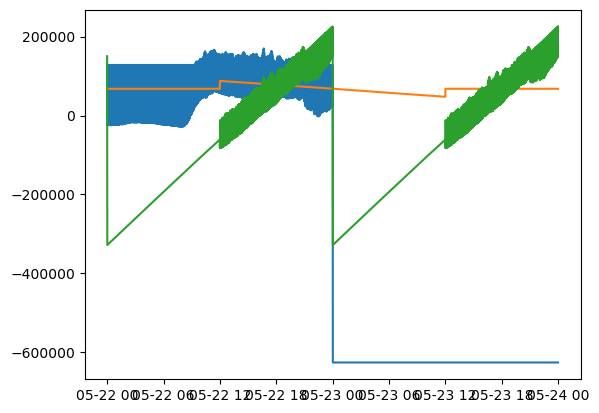

(8640,)


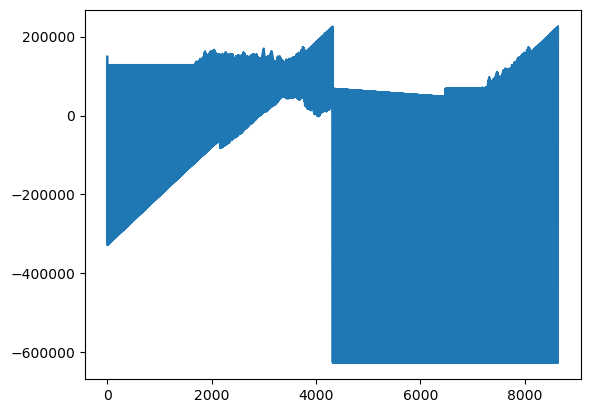

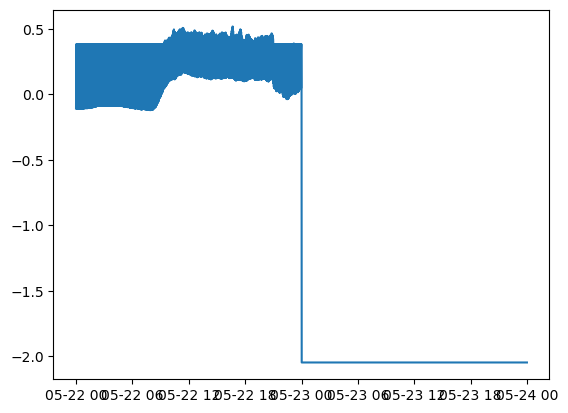

<Axes: >

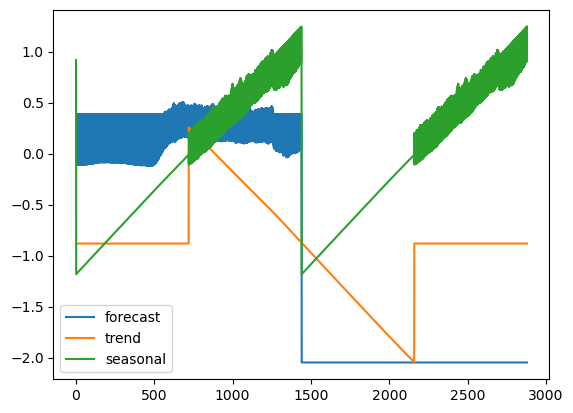

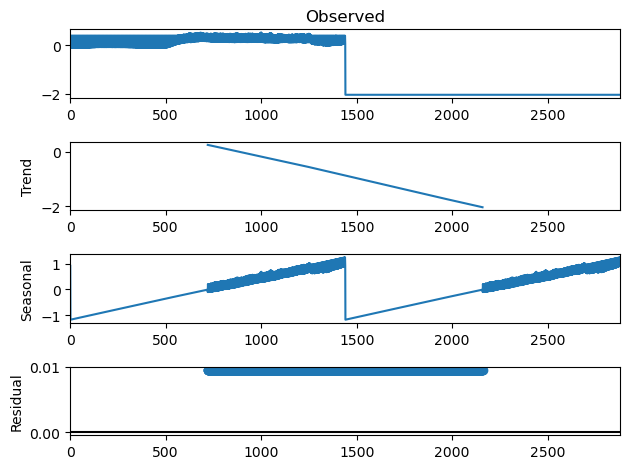

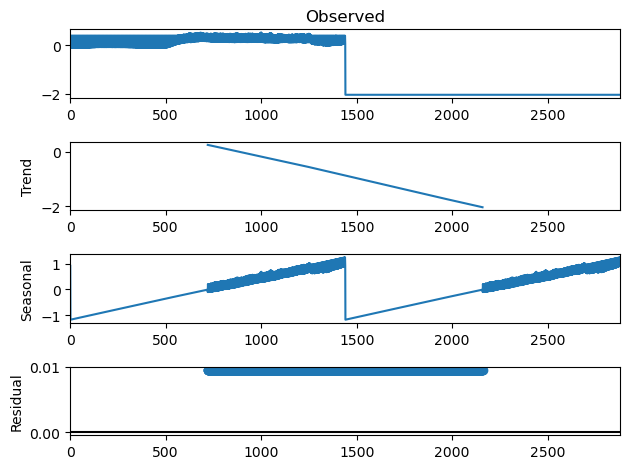

In [702]:
rec.plot()

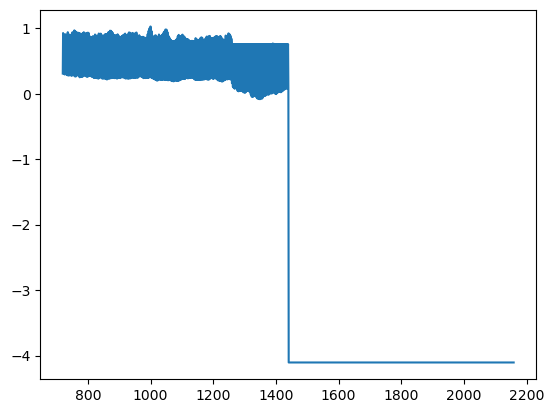

In [706]:
total = trend + rec.seasonal  + forecast
plt.plot(total)

In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Generate some sample data
# # Replace this with your own minute-to-minute data
# data = np.random.rand(1000)

# # Perform seasonal decomposition
# result = seasonal_decompose(data, model='additive', period=1440)  # Assuming daily seasonality

# # Get the seasonal component
# seasonal_component = result.seasonal

# # Prepare the data for LSTM model
# # Split the data into input (X) and output (y) sequences
# sequence_length = 10
# X = []
# y = []
# for i in range(len(data) - sequence_length):
#     X.append(np.concatenate([data[i:i+sequence_length], seasonal_component[i:i+sequence_length]]))
#     y.append(data[i+sequence_length])

# # Convert the data to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Reshape the input data to fit LSTM model requirements
# X = X.reshape(X.shape[0], X.shape[1], 1)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(2 * sequence_length, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the LSTM model
# model.fit(X, y, epochs=100, batch_size=16)

# # Make predictions with the trained model
# # Replace `test_data` with your own minute-to-minute data for prediction
# test_data = np.random.rand(10)
# test_seasonal_component = seasonal_decompose(test_data, model='additive', period=1440).seasonal
# test_input = np.concatenate([test_data, test_seasonal_component])
# test_input = test_input.reshape(1, 2 * sequence_length, 1)
# predicted_value = model.predict(test_input)

# # Print the predicted value
# print("Predicted Value:", predicted_value)


In [ ]:
# print(pred[-1445:])